<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Load-Metadata-file" data-toc-modified-id="Load-Metadata-file-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Metadata file</a></span></li></ul></li><li><span><a href="#KO-check-(optional)" data-toc-modified-id="KO-check-(optional)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>KO check (optional)</a></span></li><li><span><a href="#Read-Density-Plot" data-toc-modified-id="Read-Density-Plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read Density Plot</a></span></li><li><span><a href="#Examine-Replicates" data-toc-modified-id="Examine-Replicates-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Examine Replicates</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clustering</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>PCA</a></span></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os,re,itertools,random
from scipy import stats
from tqdm import tqdm

sns.set_style('white')

# Load Data

In [2]:
DATA_DIR = '../data/example_data/'
PRECISE_DIR = '../data/precise_data/'

In [3]:
DF_data = pd.read_csv(DATA_DIR+'log_tpm.csv',index_col = 0)

## Load Metadata file
If you are appending to PRECISE, add new rows to the PRECISE metadata sheet

In [5]:
DF_precise_metadata = pd.read_csv(PRECISE_DIR+'metadata.csv',index_col=0).fillna('')
DF_new_metadata = pd.read_csv(DATA_DIR+'example_metadata.csv',index_col=0).fillna('')

DF_metadata = pd.concat([DF_precise_metadata,DF_new_metadata],sort=False)
# Uncomment the final line to save the concatenated metadata file
DF_metadata.to_csv(DATA_DIR+'metadata.csv')
DF_metadata.tail()

,study,project_id,condition_id,rep_id,contact,library creator,run_date,Strain Description,Strain,Base Media,...,R1,R2,BAM,alignment,DOI,GEO,Public,creator,creator_email,ALE Endpoint
efeU__menFentCubiC_ale37__2,Pseudogene Repair,efeU,menFentCubiC_ale37,2,Amitesh Anand,Richard Szubin,05/21/18,Escherichia coli EEP_menF_entC_ubiC.37.25.1,MG1655,M9,...,efeU/SRR8218076_1.fastq.gz,efeU/SRR8218076_2.fastq.gz,efeU__menFentCubiC_ale37__2.bam,94.62,doi.org/10.1038/s41564-018-0340-2,GSE122779,1.0,NaN,NaN,NaN
efeU__menFentCubiC_ale38__1,Pseudogene Repair,efeU,menFentCubiC_ale38,1,Amitesh Anand,Richard Szubin,05/21/18,Escherichia coli EEP_menF_entC_ubiC.38.28.1,MG1655,M9,...,efeU/SRR8218077_1.fastq.gz,efeU/SRR8218077_2.fastq.gz,efeU__menFentCubiC_ale38__1.bam,95.65,doi.org/10.1038/s41564-018-0340-2,GSE122779,1.0,NaN,NaN,NaN
efeU__menFentCubiC_ale38__2,Pseudogene Repair,efeU,menFentCubiC_ale38,2,Amitesh Anand,Richard Szubin,05/21/18,Escherichia coli EEP_menF_entC_ubiC.38.28.1,MG1655,M9,...,efeU/SRR8218078_1.fastq.gz,efeU/SRR8218078_2.fastq.gz,efeU__menFentCubiC_ale38__2.bam,94.94,doi.org/10.1038/s41564-018-0340-2,GSE122779,1.0,NaN,NaN,NaN
PROJECT__CONDITION__1,NaN,PROJECT,CONDITION,1,NaN,NaN,01/01/18,Escherichia coli K-12 MG1655,NaN,M9,...,,,,94.33,,,NaN,person,person@ucsd.edu,0.0
PROJECT__CONDITION__2,NaN,PROJECT,CONDITION,2,NaN,NaN,01/01/18,Escherichia coli K-12 MG1655,NaN,M9,...,,,,94.24,,,NaN,person,person@ucsd.edu,0.0


Confirm metadata has same samples as DF_data

In [5]:
all(DF_data.columns == DF_metadata.index)

True

# KO check (optional)
Make sure that knocked-out genes have a low TPM. Add new KO'd gene IDs into `gene_dict`. This automatically searches for either "del\_" or "delta\_" in the "Strain Description" column.

In [6]:
gene_dict = {'fur':'b0683','gadX':'b3516','gadW':'b3515','gadE':'b3512',
             'soxS':'b4062','soxR':'b4063','oxyR':'b3961','cra':'b0080',
             'crp':'b3357','nac':'b1988','fabR':'b3963','mntR':'b0817',
             'fadR':'b1187','cbl':'b1987','ompR':'b3405','pgi':'b4025',
             'yafC':'b0208','yeiE':'b2157','yiaJ':'b3574','yieP':'b3755',
             'ybaO':'b0447','ybaQ':'b0483','ybiH':'b0796','ydcI':'b1422',
             'yddM':'b1477','yheO':'b3346','purR':'b1658','menF':'b2265'}

In [7]:
KO_runs = DF_metadata[['del_' in strain or 'delta_' in strain for strain in DF_metadata['Strain Description']]]

l2s = []

for i,row in KO_runs.iterrows():
    searcher = re.search('del_(\w*)|delta_(.*)',row['Strain Description'])
    gene = searcher.group(1)
    if searcher.group(1) == None:
        gene = searcher.group(2)
        
    locus = gene_dict[gene]
    l2s.append((gene,locus,row.name,DF_data.loc[locus,row.name]))
df_ko = pd.DataFrame(l2s,columns=['Gene KO','Locus KO','Exp name','log-TPM'])
df_ko = df_ko.set_index('Exp name')
df_ko.head()

,Gene KO,Locus KO,log-TPM
Exp name,,,
fur__delfur_dpd__1,fur,b0683,0.00000
fur__delfur_dpd__2,fur,b0683,1.16121
fur__delfur_fe2__1,fur,b0683,0.00000
fur__delfur_fe2__2,fur,b0683,0.00000
acid__delgadx_ph5__1,gadX,b3516,0.00000


# Read Density Plot
If there are distributions with significant differences, this may indicate low quality data (such as the red line below).

Text(0.5, 0, 'log(# reads)')

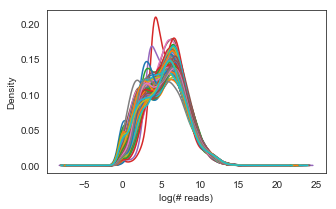

In [8]:
fig,ax = plt.subplots(figsize=(5,3))
DF_data.plot(kind='kde',legend=False,ax=ax)
ax.set_xlabel('log(# reads)')

# Examine Replicates

In [9]:
from sklearn.metrics import r2_score

In [10]:
rep_corrs = {}
rand_corrs = {}
for name1,name2 in tqdm(list(itertools.combinations(DF_data.columns,2))):
    if name1[:-3] == name2[:-3]:
        rep_corrs[(name1,name2)] = r2_score(DF_data[name1],DF_data[name2])
    else:
        rand_corrs[(name1,name2)] = r2_score(DF_data[name1],DF_data[name2])

100%|██████████| 39060/39060 [00:10<00:00, 3553.70it/s]


Median Pearson R between replicates: 0.98


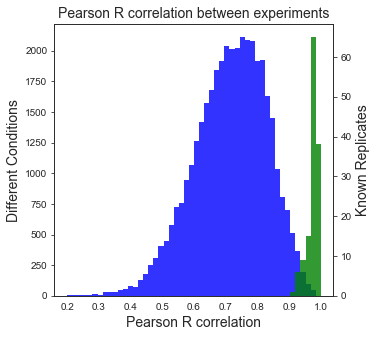

In [11]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [12]:
print('Most dissimilar pairs of conditions:')
for x in sorted([(k,v) for k,v in rand_corrs.items() if v < 0.2],key=lambda x: x[0][0]):
    print(x)

Most dissimilar pairs of conditions:
(('ica__cytd_rib__2', 'PROJECT__CONDITION__1'), 0.13132216794297358)
(('ica__cytd_rib__2', 'PROJECT__CONDITION__2'), 0.1456609898962703)
(('minspan__bw_delcra_trp__1', 'rpoB__rpoBE672K_glc__1'), 0.18992044623976823)
(('minspan__bw_delcra_trp__1', 'rpoB__rpoBE672K_lb__1'), 0.14056661401043213)
(('minspan__bw_delcra_trp__1', 'rpoB__rpoBE672K_lb__2'), 0.1635688538911525)
(('minspan__wt_trp__1', 'rpoB__rpoBE672K_lb__1'), 0.18767744969426026)
(('omics__wt_thr__1', 'rpoB__rpoBE672K_lb__1'), 0.17394231702115226)
(('omics__wt_thr__1', 'rpoB__rpoBE672K_lb__2'), 0.19896301586354748)
(('omics__wt_thr__1', 'glu__glu_ale6__1'), 0.17646265682464513)


In [13]:
print('Most similar pairs of conditions:')
for x in sorted([(k,v) for k,v in rand_corrs.items() if v > 0.98],key=lambda x: x[0][0]):
    print(x)

Most similar pairs of conditions:
(('acid__wt_ph5__1', 'acid__delgadx_ph5__2'), 0.9813500699214064)
(('acid__wt_ph5__1', 'acid__delgadw_ph5__1'), 0.980611994522927)
(('acid__wt_ph5__1', 'acid__delgadw_ph5__2'), 0.9800638319751663)
(('acid__wt_ph5__2', 'acid__delgadx_ph5__2'), 0.9807221672595746)
(('acid__wt_ph5__2', 'acid__delgadw_ph5__1'), 0.981681374180288)
(('pal__lyx_ale2__1', 'pal__lyx_ale4__1'), 1.0)
(('pal__lyx_ale2__2', 'pal__lyx_ale4__2'), 1.0)


In [14]:
print('Most dissimilar replicates:')
for x in [(k,v) for k,v in rep_corrs.items() if v < 0.95]:
    print(x)

Most dissimilar replicates:
(('nac_ntrc__bw_delnac_csn__1', 'nac_ntrc__bw_delnac_csn__2'), 0.9475306849140785)
(('minspan__wt_glc_anaero__1', 'minspan__wt_glc_anaero__2'), 0.9173126401204817)
(('ica__wt_glc__1', 'ica__wt_glc__3'), 0.9418561347050006)
(('ica__wt_glc__1', 'ica__wt_glc__4'), 0.9320460413534035)
(('ica__wt_glc__1', 'ica__wt_glc__5'), 0.9456808721813939)
(('ica__wt_glc__1', 'ica__wt_glc__6'), 0.9414366439487781)
(('ica__wt_glc__2', 'ica__wt_glc__3'), 0.9400241807612404)
(('ica__wt_glc__2', 'ica__wt_glc__4'), 0.9315866723280884)
(('ica__wt_glc__2', 'ica__wt_glc__6'), 0.9451663825216956)
(('ica__wt_glc__3', 'ica__wt_glc__5'), 0.9250114836531262)
(('ica__wt_glc__3', 'ica__wt_glc__6'), 0.9201780260591881)
(('ica__wt_glc__4', 'ica__wt_glc__5'), 0.9307225518859304)
(('ica__wt_glc__4', 'ica__wt_glc__6'), 0.9269069636780491)
(('ytf__delybiH__1', 'ytf__delybiH__2'), 0.9474678375596882)
(('PROJECT__CONDITION__1', 'PROJECT__CONDITION__2'), 0.9453559727179008)


# Clustering

In [15]:
arr = np.ones((len(DF_data.columns),len(DF_data.columns)))
for i,col1 in tqdm(enumerate(DF_data.columns)):
    for j,col2 in enumerate(DF_data.columns):
        if i < j:
            r = stats.pearsonr(DF_data[col1],DF_data[col2])[0]
            arr[i,j] = r
            arr[j,i] = r

280it [00:05, 55.47it/s] 


In [16]:
pdict = dict(zip(DF_metadata['project_id'].unique(),
                 ['red','pink','y','orchid','mediumvioletred','green','lightgray','lime',
                  'slategray','blue','saddlebrown','aqua','orange','yellow',
                  'c','white','black','fuchsia','dodgerblue','darkgray','lightblue',
                  'darkorange','silver']))

In [17]:
row_colors= [pdict[proj] for proj in DF_metadata.project_id]

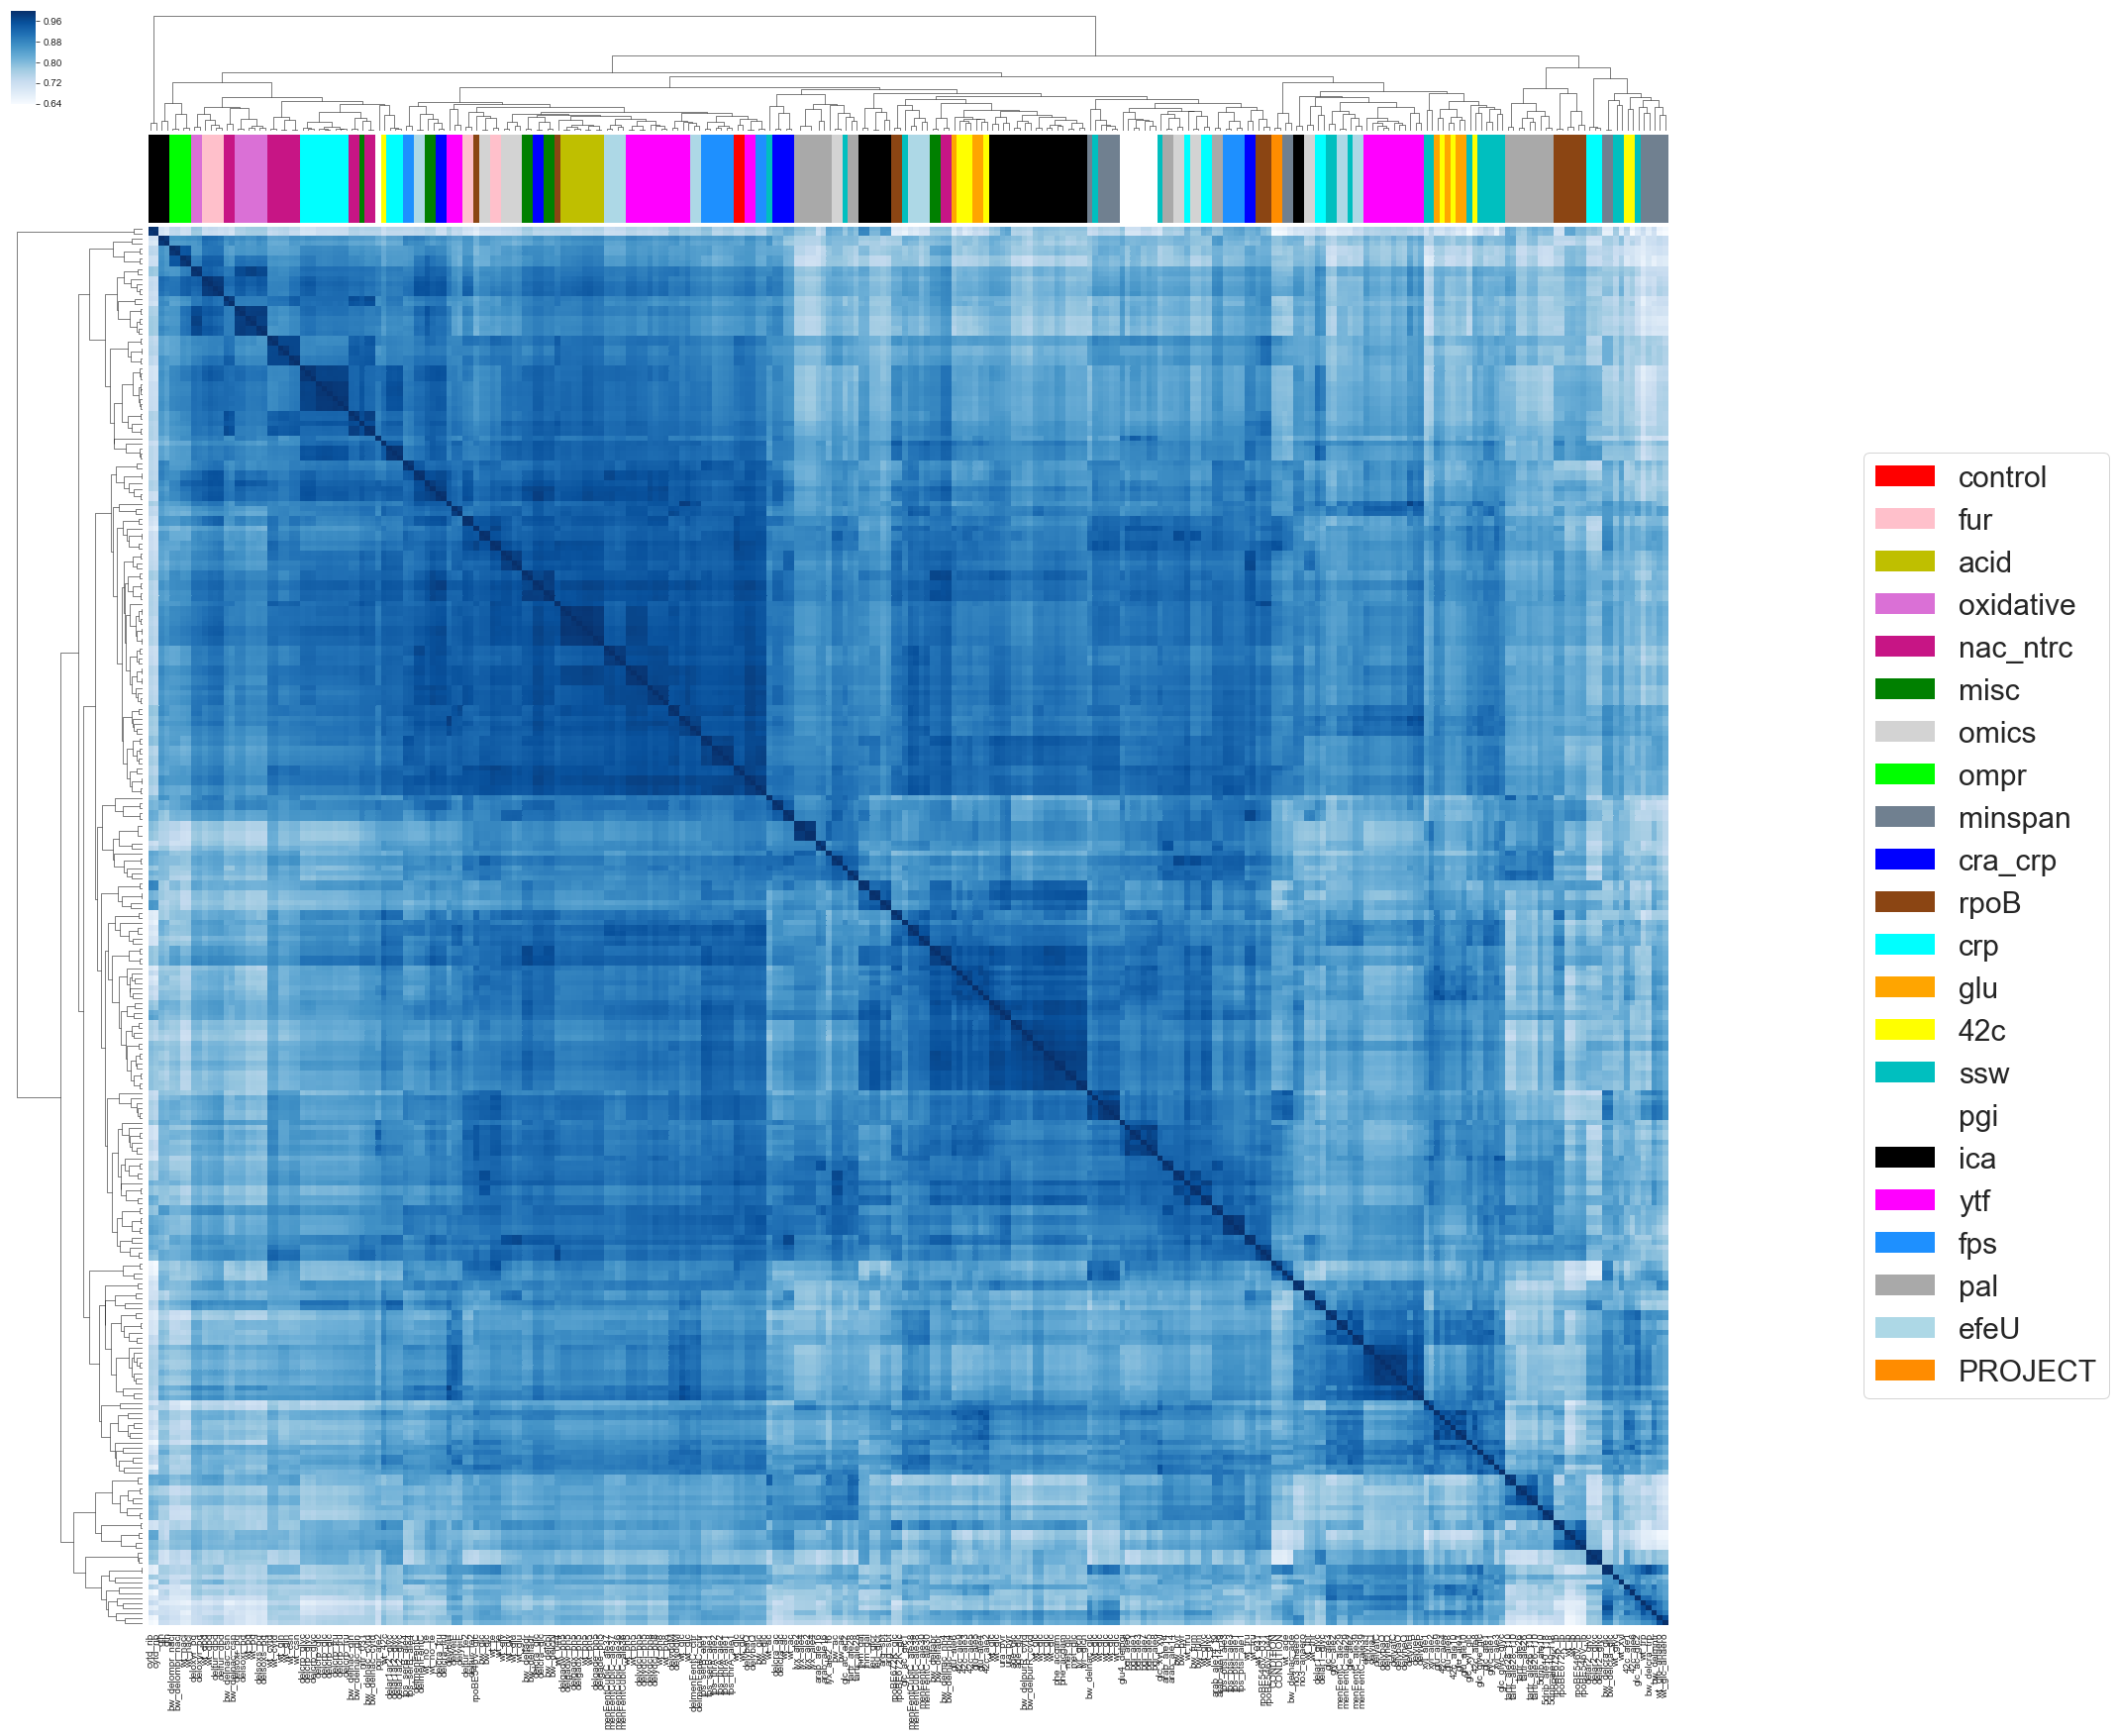

In [18]:
g = sns.clustermap(arr,cmap='Blues',yticklabels=[],xticklabels=DF_metadata.condition_id,
                   col_colors=row_colors,figsize=(30,30),robust=False)
for label in DF_metadata.project_id.unique():
    g.ax_heatmap.bar(0, 0, facecolor=pdict[label],
                            label=label, linewidth=0)
g.ax_heatmap.legend(loc="right", ncol=1,bbox_to_anchor=(1.3,0.5),fontsize=30)

# PCA

In [19]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

pca = PCA()
DF_weights = pd.DataFrame(pca.fit_transform(DF_data.transpose()),index=DF_data.columns)
DF_components = pd.DataFrame(pca.components_.T,index=DF_data.index)
var_cutoff = 0.99

Number of dimensions for 99% of variance: 202


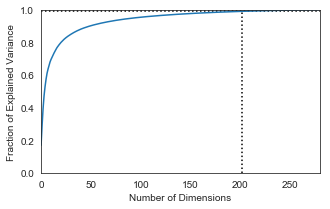

In [20]:
fig,ax = plt.subplots(figsize=(5,3))
pca_var = np.cumsum(pca.explained_variance_ratio_)
ax.plot(pca_var)
dims = np.where(pca_var > var_cutoff)[0][0] + 1
ax.vlines(dims,0,1,linestyles='dotted')
ax.hlines(var_cutoff,0,len(DF_data.columns),linestyles='dotted')
ax.set_ylim(0,1)
ax.set_xlim(0,len(DF_data.columns))
ax.set_ylabel('Fraction of Explained Variance')
ax.set_xlabel('Number of Dimensions')
print('Number of dimensions for 99% of variance:',dims)
None

In [21]:
pdict = dict(zip(DF_metadata['project_id'].unique(),
                 ['red','pink','y','orchid','mediumvioletred','green','lightgray','lime',
                  'slategray','blue','saddlebrown','aqua','turquoise','lightskyblue',
                  'c','skyblue','lightblue','fuchsia','dodgerblue','sandybrown','white',
                  'yellow','goldenrod','chocolate','purple','yellow']))

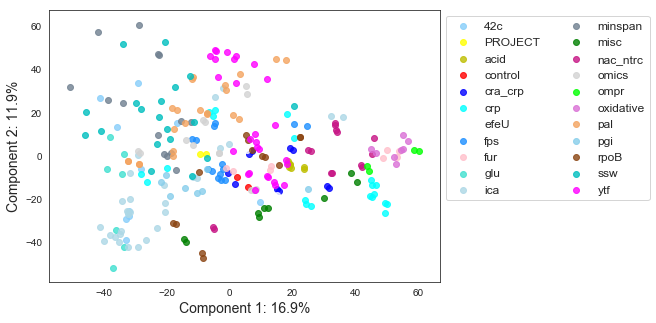

In [22]:
fig,ax = plt.subplots(figsize=(7,5))
for name,group in DF_metadata.groupby('project_id'):
    idx = DF_data.loc[:,group.index.tolist()].columns.tolist()
    ax.scatter(DF_weights.loc[idx,0],
               DF_weights.loc[idx,1],
               c=pdict[name],
               label=name,alpha=0.8)
ax.set_xlabel('Component 1: %.1f%%'%(pca.explained_variance_ratio_[0]*100),fontsize=14)
ax.set_ylabel('Component 2: %.1f%%'%(pca.explained_variance_ratio_[1]*100),fontsize=14)
plt.legend(bbox_to_anchor=(1,1),fontsize=12,ncol=2)